In [1]:
!pip install -q qiskit
!pip install -q qiskit-aer


Importing Libraries


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import RXXGate, RYYGate, RZZGate
import numpy as np


In [3]:
J=1#coupling_strength
t=np.pi
theta=-2*J*t#Rotation angle used for RXX, RYY, RZZ gates.Qiskit defines RXX(θ) = exp(-i θ/2 X⊗X).So to simulate exp(-i Jt X⊗X), we must use θ = -2 * J * t

In [4]:
qc_2spin=QuantumCircuit(2)

# Initialize both qubits into superposition using Hadamard gates
qc_2spin.h(0)
qc_2spin.h(1)# It simulates a more dynamic initial state that interacts meaningfully under the Hamiltonian

qc_2spin.append(RXXGate(-2*J*t), [0, 1]) # Simulates X0X1 interaction
qc_2spin.append(RYYGate(-2*J*t), [0, 1]) # Simulates Y0Y1 interaction
qc_2spin.append(RZZGate(-2*J*t), [0, 1]) # Simulates Z0Z1 interaction
qc_2spin.measure_all()


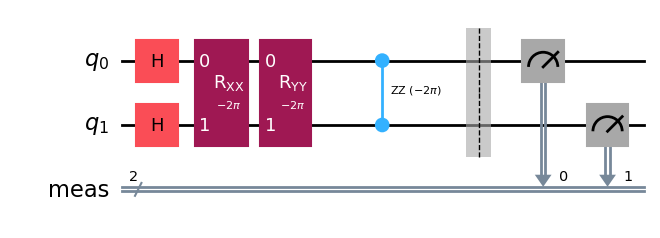

In [5]:
qc_2spin.draw('mpl')

In [6]:
# Simulate the circuit using Qiskit Aer (simulator backend)
backend = Aer.get_backend('aer_simulator')

# Transpile (optimize for backend) and run the circuit
job = backend.run(transpile(qc_2spin, backend))

# Get measurement results (bitstring counts)
counts = job.result().get_counts()

# Print the results (e.g., {'00': 500, '11': 500})
print("Two-spin results:", counts)


Two-spin results: {'01': 266, '11': 264, '10': 258, '00': 236}


Text(0.5, 1.0, 'Two-Spin Heisenberg Model Results')

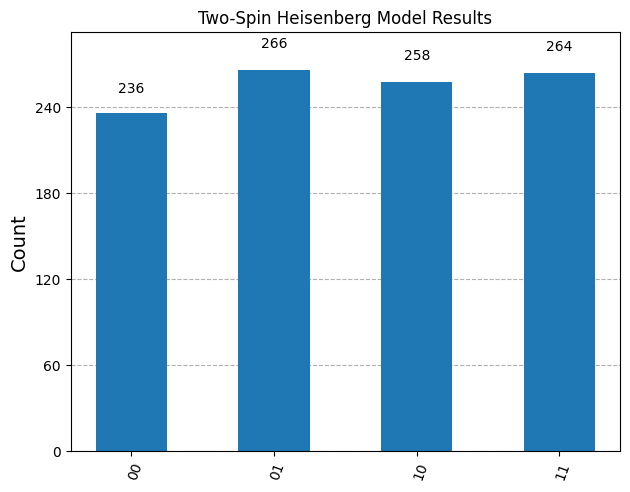

In [7]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

plot_histogram(counts)
plt.title("Two-Spin Heisenberg Model Results")

3 Spin


In [8]:
qc_3spin= QuantumCircuit(3)
qc_3spin.h(0)
qc_3spin.h(1)
qc_3spin.h(2)

for i, j in [(0,1), (1,2)]:
    qc_3spin.append(RXXGate(theta), [i, j])
    qc_3spin.append(RYYGate(theta), [i, j])
    qc_3spin.append(RZZGate(theta), [i, j])

qc_3spin.measure_all()  


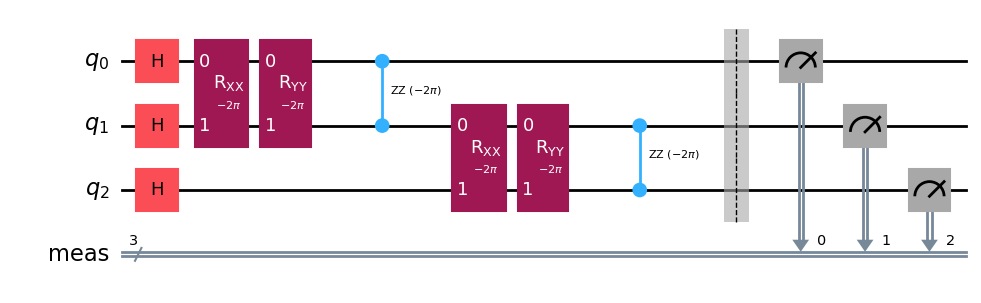

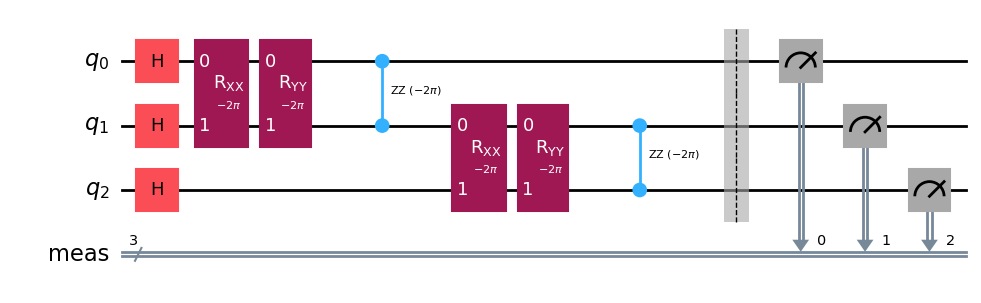

In [10]:
qc_3spin.draw('mpl')

In [11]:
# Simulate the circuit using Qiskit Aer (simulator backend)
backend_3 = Aer.get_backend('aer_simulator')

# Transpile (optimize for backend) and run the circuit
job_3 = backend.run(transpile(qc_3spin, backend_3))

# Get measurement results (bitstring counts)
counts_3 = job_3.result().get_counts()

# Print the results (e.g., {'00': 500, '11': 500})
print("Two-spin results:", counts_3)


Two-spin results: {'101': 134, '010': 129, '110': 138, '100': 130, '001': 128, '111': 140, '000': 106, '011': 119}


Text(0.5, 1.0, 'Three-Spin Heisenberg Model Results')

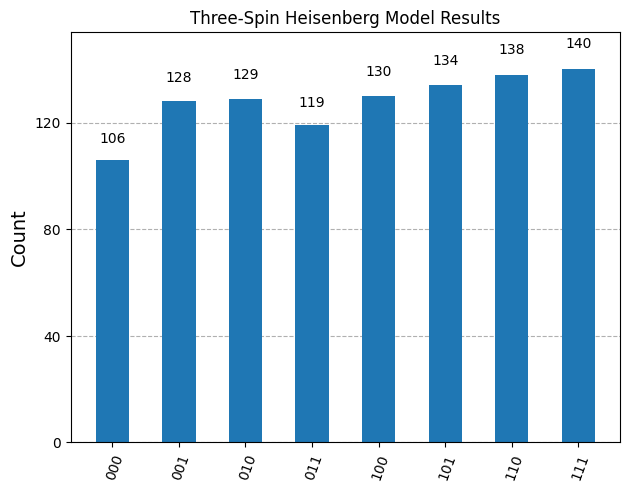

In [12]:
%matplotlib inline

plot_histogram(counts_3)
plt.title("Three-Spin Heisenberg Model Results")